# Spectral derivative in **2D** in NumPy (using `rfft`)

$$ \nabla f (\vec{x}) = \text{ifft2} \left( i \vec{k} \odot \text{fft2} \left( f(\vec{x}) \right) \right) $$

If $f$ is a real-valued function, i.e., $f(\vec{x}) \in \mathbb{R}$, then we can
save some computation with the real-valued Fourier transform:

$$ \nabla f (\vec{x}) = \text{irfft2} \left( i \vec{k}_{real} \odot \text{rfft2} \left( f(\vec{x}) \right) \right) $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Assuming the domain is [0, L]^2 with identical number of grid points in each
# direction for now
L = 1.0
N = 100

In [3]:
# IMPORTANT: endpoint is not included as per FFT convention
mesh_1d = np.linspace(0, L, N, endpoint=False)
X, Y = np.meshgrid(mesh_1d, mesh_1d)
mesh = np.stack((X, Y))

In [4]:
f = lambda x: np.sin(2 * np.pi * x[0]) * np.sin(4 * np.pi * x[1])
f_x0 = lambda x: 2 * np.pi * np.cos(2 * np.pi * x[0]) * np.sin(4 * np.pi * x[1])
f_x1 = lambda x: np.sin(2 * np.pi * x[0]) * 4 * np.pi * np.cos(4 * np.pi * x[1])

In [5]:
f_h = f(mesh)
f_x0_h = f_x0(mesh)
f_x1_h = f_x1(mesh)

In [6]:
def plot_contour_row(*fields, levels=np.linspace(-1, 1, 11), cmap="RdBu_r"):
    fig, axes = plt.subplots(1, len(fields), figsize=(5*len(fields), 5))
    for ax, field in zip(axes, fields):
        a = ax.contourf(X, Y, field, levels=levels, cmap=cmap)
        ax.set_aspect("equal")
        ax.set_xlabel("$x_0$")
        ax.set_ylabel("$x_1$")

    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    fig.colorbar(a, cax=cbar_ax)

    return fig, axes

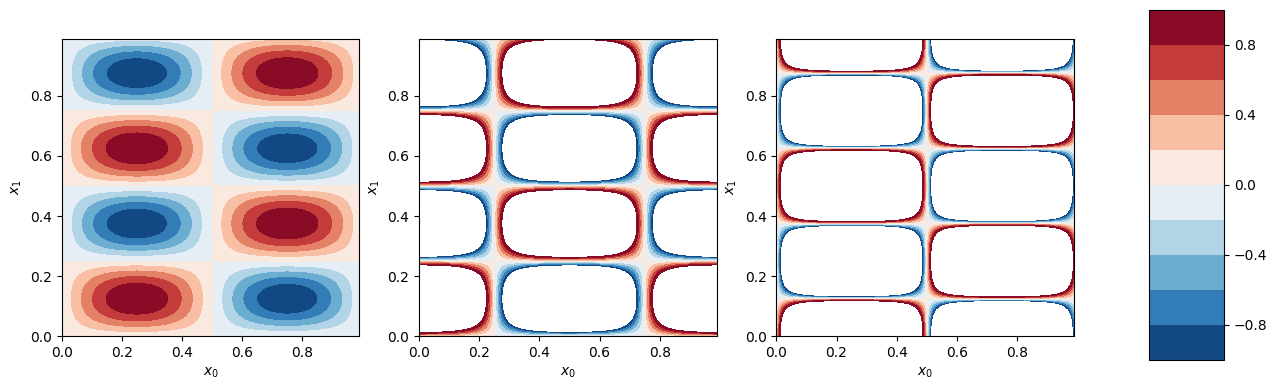

In [7]:
plot_contour_row(f_h, f_x0_h, f_x1_h);

In [19]:
wavenumbers_1d_real = np.fft.rfftfreq(N, d=1/N) * 2 * np.pi / L
wavenumbers_1d_full = np.fft.fftfreq(N, d=1/N) * 2 * np.pi / L
KX, KY = np.meshgrid(wavenumbers_1d_real, wavenumbers_1d_full)
wavenumbers = np.stack((KX, KY))

In [20]:
# Expected shape: (2, N, N//2+1)
wavenumbers.shape

(2, 100, 51)

In [21]:
# More precisely: the "gradient" operator (as it accumulates all partial derivatives)
derivative_operator = 1j * wavenumbers

In [23]:
f_x0_h_spectrally = np.fft.irfft2(
    derivative_operator[0] * np.fft.rfft2(f_h),
    s=(N, N),
)

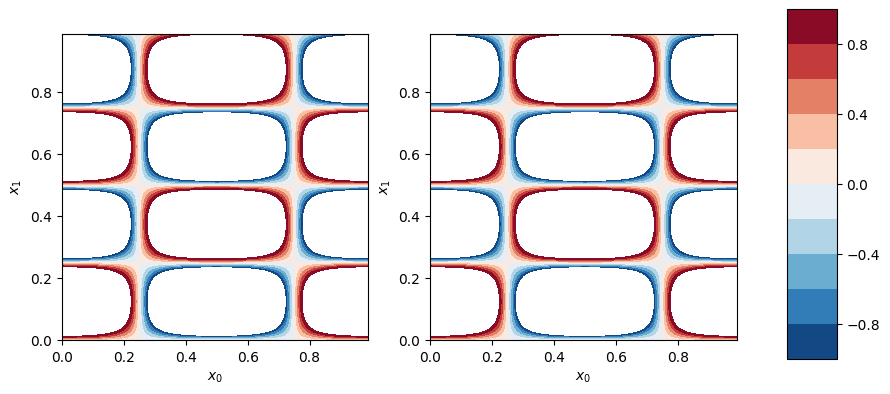

In [24]:
plot_contour_row(f_x0_h, f_x0_h_spectrally);

In [25]:
np.linalg.norm(f_x0_h_spectrally - f_x0_h) / np.linalg.norm(f_x0_h)

7.999829907303891e-15